<a href="https://colab.research.google.com/github/lucasmoratof/customers_review_project/blob/master/Removing_Outliers_with_Z_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to deal with Outliers using Z-Score.

In [0]:
# Load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [0]:
# Load data and check first lines

reviews = pd.read_csv('https://raw.githubusercontent.com/lucasmoratof/customers_review_project/master/reviews_for_cleaning.csv', index_col=0)

In [27]:
# checking first rows
reviews.head()

,order_status,delivery_in_days,product_id,product_category_name,product_photos_qty,price,freight_value,payment_type,payment_installments,customer_city,seller_id,is_good_review
3,delivered,13.0,595fac2a385ac33a80bd5114aec74eb8,perfumery,1.0,118.7,22.76,boleto,1.0,barreiras,289cdb325fb7e7f891c38608bf9e0962,1
4,delivered,9.0,aa4383b373c6aca5d8797843e5594415,auto,1.0,159.9,19.22,credit_card,3.0,vianopolis,4869f7a5dfa277a7dca6462dcf3b52b2,1
5,delivered,13.0,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,3.0,45.0,27.20,credit_card,1.0,sao goncalo do amarante,66922902710d126a0e7d26b0e3805106,1
6,delivered,2.0,65266b2da20d04dbe00c5c2d3bb7859e,stationery,4.0,19.9,8.72,credit_card,1.0,santo andre,2c9e548be18521d1c43cde1c582c6de8,1
7,delivered,16.0,060cb19345d90064d1015407193c233d,auto,1.0,147.9,27.36,credit_card,6.0,congonhinhas,8581055ce74af1daba164fdbd55a40de,1


In [59]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84502 entries, 3 to 119150
Data columns (total 12 columns):
order_status             84502 non-null object
delivery_in_days         84502 non-null float64
product_id               84502 non-null object
product_category_name    84502 non-null object
product_photos_qty       84502 non-null float64
price                    84502 non-null float64
freight_value            84502 non-null float64
payment_type             84502 non-null object
payment_installments     84502 non-null float64
customer_city            84502 non-null object
seller_id                84502 non-null object
is_good_review           84502 non-null int64
dtypes: float64(5), int64(1), object(6)
memory usage: 8.4+ MB


Before dealing with outliers, we need to make sure to have no null values on our dataset: 

In [51]:
# filling the delivery days with the mean value:
reviews['delivery_in_days'].fillna(reviews['delivery_in_days'].mean(), inplace= True)

# fill product photos with 0
reviews['product_photos_qty'].fillna(value= 0, inplace=True)

# Dropping all other rows with null values:
reviews.dropna(how='any', axis=0, inplace=True)

# checking the shape and the number of null rows:
print(reviews.shape)
reviews.isnull().sum()

(84502, 12)


order_status             0
delivery_in_days         0
product_id               0
product_category_name    0
product_photos_qty       0
price                    0
freight_value            0
payment_type             0
payment_installments     0
customer_city            0
seller_id                0
is_good_review           0
dtype: int64

Now let's create a boxplot for product_photos_qty to check the presence of outliers:

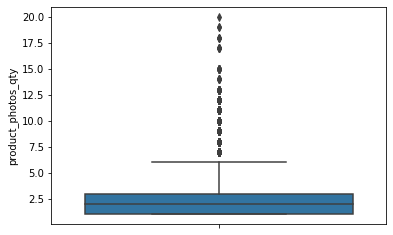

In [28]:
# Ploting the distribution
# Showing the presence of outliers in one feature
sns.boxplot(y=reviews['product_photos_qty'])

We can see that we have indeed many outliers, so let's group the numerical data together and aply the z-scores to clean it.

In [52]:
# Just to make this block of code to work independently, I will recreate the list with numerical columns
num_cols_names = reviews.select_dtypes(exclude=['object']).columns

# calculate the zscore for the numerical columns
z_numbers= np.abs(stats.zscore(reviews[num_cols_names]))

# drop the rows with z-scores higher than the threshold 3
num_df = reviews[(z_numbers < 3).all(axis=1)]

# leave just the numerical columns, we will concatenate it later
num_df = num_df[num_cols_names]

#checking the size of the dataset after the change
print(num_df.shape)
num_df.head()

(79070, 6)


,delivery_in_days,product_photos_qty,price,freight_value,payment_installments,is_good_review
3,13.0,1.0,118.7,22.76,1.0,1
4,9.0,1.0,159.9,19.22,3.0,1
5,13.0,3.0,45.0,27.20,1.0,1
6,2.0,4.0,19.9,8.72,1.0,1
7,16.0,1.0,147.9,27.36,6.0,1


Let's check again the boxplot for product_photo_id:

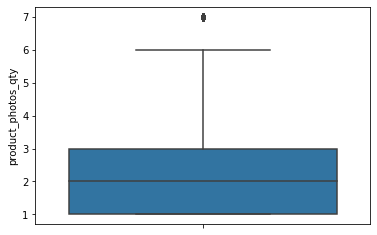

In [54]:
# Checking the same column we did the boxplot previously to check if it worked. 
sns.boxplot(y=num_df['product_photos_qty'])

Good job! Now we just need to group the data together again. We are going to use concatanation to do that.

In [0]:
# Doing the concatanation

cat_df = reviews.select_dtypes(include=['object']).copy()
reviews_updated = pd.concat((num_df, cat_df), axis=1, join='inner')

In [58]:
reviews_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79070 entries, 3 to 119150
Data columns (total 12 columns):
delivery_in_days         79070 non-null float64
product_photos_qty       79070 non-null float64
price                    79070 non-null float64
freight_value            79070 non-null float64
payment_installments     79070 non-null float64
is_good_review           79070 non-null int64
order_status             79070 non-null object
product_id               79070 non-null object
product_category_name    79070 non-null object
payment_type             79070 non-null object
customer_city            79070 non-null object
seller_id                79070 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 7.8+ MB
